In [1]:
#Importing Tensorflow
import tensorflow as tf

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [3]:
#Checking for the Tensorflow version
print(tf.__version__)

2.0.0


In [4]:
#Importing the dataset
dataset = pd.read_csv(r'C:\Users\Jay Shah\Downloads\Building-Your-First-ANN-with-TensorFlow-2.0-master\Customer_Churn_Modelling.csv')

# Data Exploration

In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split

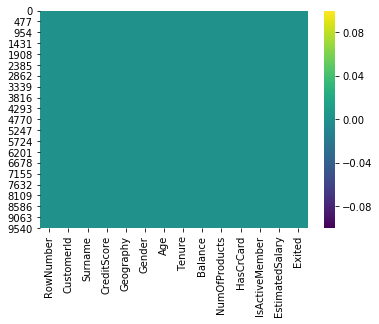

In [6]:
sns.heatmap(dataset.isnull(), cmap = 'viridis')#No null values

In [7]:
dataset.columns #Checking for the columns in the dataset

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
dataset.describe()#Getting the summary of the dataset

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
#Distinguishing the independent and dependent variables and dropping the unnecessary columns at the same time
X = dataset.drop(['CustomerId', 'RowNumber', 'Surname', 'Exited'], axis = 1)
y = dataset['Exited']

Handling the Categorical Data

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [15]:
#Working for the categorical variables Geography and Gender
label_geo = LabelEncoder()
X['Geography'] = label_geo.fit_transform(X['Geography'])
label_gender = LabelEncoder()
X['Gender'] = label_gender.fit_transform(X['Gender'])

In [16]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [17]:
#Now we break the numerical linearity in the values of the categorical variables
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])

In [19]:
X.head() #The colums 'Geography_1' and 'Geography_2' are created

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


### Splitting the dataset into Training set and test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Applying Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Building the Model

In [26]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
#Now we optimize the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train.to_numpy(), batch_size=10, epochs=20, verbose = 1)

Train on 8000 samples
Epoch 1/20
8000/8000 [==============================] - 4s 543us/sample - loss: 0.4511 - accuracy: 0.8081
Epoch 2/20
8000/8000 [==============================] - 2s 285us/sample - loss: 0.3760 - accuracy: 0.8432
Epoch 3/20
8000/8000 [==============================] - 2s 280us/sample - loss: 0.3594 - accuracy: 0.8528
Epoch 4/20
8000/8000 [==============================] - 2s 273us/sample - loss: 0.3518 - accuracy: 0.8565
Epoch 5/20
8000/8000 [==============================] - 2s 284us/sample - loss: 0.3432 - accuracy: 0.8602
Epoch 6/20
8000/8000 [==============================] - 2s 280us/sample - loss: 0.3403 - accuracy: 0.8596
Epoch 7/20
8000/8000 [==============================] - 2s 287us/sample - loss: 0.3372 - accuracy: 0.8626
Epoch 8/20
8000/8000 [==============================] - 2s 278us/sample - loss: 0.3354 - accuracy: 0.8640
Epoch 9/20
8000/8000 [==============================] - 2s 276us/sample - loss: 0.3324 - accuracy: 0.8646
Epoch 10/20
8000/8000 [=

In [29]:
#Now we predict the model
y_predict = model.predict_classes(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predict))

[[1534   61]
 [ 229  176]]


In [34]:
print(accuracy_score(y_test, y_predict))

0.855
